### BaggingClassifier

Basic Example of Bagging implementation

## About the Data

In this Jupyter notebook, we will explore a dataset containing various features extracted from URLs. Each feature is associated with a label indicating the nature of the URL:

    Legitimate: 1,
    Suspicious: 0,
    Phishing: -1
    
Our goal is to develop a machine Learing Classifier model trained on this dataset to predict whether a given URL corresponds to a malicious website. Through this analysis, we aim to build a robust model capable of identifying potentially malicious URLs and enhancing cybersecurity measures.


Dataset Features:

    having_IP_Address
    URL_Length
    Shortining_Service
    having_At_Symbol
    double_slash_redirecting
    Prefix_Suffix
    having_Sub_Domain
    SSLfinal_State
    Domain_registeration_length
    Favicon
    port
    HTTPS_token
    Request_URL
    URL_of_Anchor
    Links_in_tags
    SFH
    Submitting_to_email
    Abnormal_URL
    Redirect
    on_mouseover
    RightClick
    popUpWidnow
    Iframe
    age_of_domain
    DNSRecord
    web_traffic
    Page_Rank
    Google_Index
    Links_pointing_to_page
    Statistical_report
    Result

## 1. Importing Libraries

In [1]:
# Data handling
import pandas as pd

# for model creation and evaluation
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
# performance metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# for vizualisation
import matplotlib.pyplot as plt
import seaborn as sns

# supress warnings
import warnings
warnings.simplefilter('ignore')

## 2. Data Load & Overview

In [2]:
# importing data
data = pd.read_csv('../Data/PhishingWebsites.csv')

In [3]:
# creating a copy of the dataset to avoid permanent changes
df = data.copy()

In [4]:
# looking at the size of the dataset
print(f' *There are {df.shape[0]} observations')
print(f' *There are {df.shape[1]} variables including a dependant variable')

 *There are 11055 observations
 *There are 31 variables including a dependant variable


In [5]:
# looking at the data
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


* All data is nominal
* feature values include:
    - 1: legitimate
    - 0: Suspicious
    - -1: Phishing

In [6]:
# looking at the distribution of dependent variable
df['Result'].value_counts()

Result
 1    6157
-1    4898
Name: count, dtype: int64

* Data is balanced
* Phishing websites make up for ~44% of the data

## 3. Data Preprocessing

The dataset is already very clean, therefore this step will not be necessary for this model

### 4. Model

* Build Model
* Evaluate Model
* Make predictions
* visualize model

In [7]:
# splitting data
X = df.drop('Result', axis=1) # independant variables
y = df['Result']                # dependant variable

# Splitting data 7:3 into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [8]:
# Defining model
model = BaggingClassifier()

# Training model
model.fit(X_train, y_train);


### 4.2 Evaluate Model

* Checking Accuracy of model in both training and testing data

In [9]:
# function for looking at the performance of a classification model
def model_performance(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

In [10]:
# looking at performance metrics for training and testing data
display(model_performance(model,X_train,y_train))
display(model_performance(model,X_test,y_test))

,Accuracy,Recall,Precision,F1
0,0.98992,0.993533,0.988511,0.991016


,Accuracy,Recall,Precision,F1
0,0.965029,0.978106,0.959206,0.968564


Model returned high accuracy in both training and testing data, indicating there is no overfitting

## 4.3 Making a prediction

In [11]:
# creating feature values for prediction
new_website_features = [[1,1,0,1,-1,1,1,0,1,1,
                         1,0,1,1,1,1,0,-1,0,0,
                         1,0,0,1,1,1,1,1,1,1]]

# making a prediction on the created feature values
pred = model.predict(new_website_features)

dict = {1:'Legitimate',0:'Suspicious',-1:'Phishing'}
print(f'Based on the entered values, the model predicts this is a {dict[pred[0]]} website')

Based on the entered values, the model predicts this is a Legitimate website


## 4.3.1 Describing performance of model predictions

In [12]:
# Function to display model confusion_matrix
def c_matrix(y_test,y_pred):
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=['Malicious', 'Legitimate'] )
    cm_display.plot()
    plt.show()

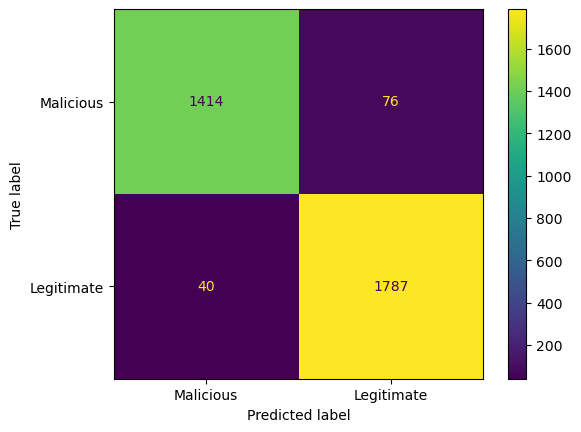

In [13]:
# getting predictions for the testing data
predictions = model.predict(X_test)

# creating confusion matrix
c_matrix(y_test,predictions)

Observations:

* 1415 True Positives: correctly predicted as positive (malicious)
* 1773 True Negatives: correctly predicted as negative (legitimate)
* 75 False Negativs: incorrectly predicted as negative
* 54 False Positives: incorrectly predicted as positive

## 5. Hyper Parameter Tuning

In [14]:
# Hyper parameter tunning on n_estimators (number of decision trees to use)
for n_estimator in [20,50,100,150,200]:
    
    #initialize and train model
    model = BaggingClassifier(n_estimators=n_estimator,
                                 random_state = 123)
    model.fit(X_train, y_train)
    
    # showing scores
    print(f'Number of Trees = {n_estimator}')
    print(f'Accuracy on training set: {model.score(X_train, y_train):.2f}')
    print(f'Accuracy on test set: {model.score(X_test, y_test):.2f}\n')

Number of Trees = 20
Accuracy on training set: 0.99
Accuracy on test set: 0.96

Number of Trees = 50
Accuracy on training set: 0.99
Accuracy on test set: 0.96

Number of Trees = 100
Accuracy on training set: 0.99
Accuracy on test set: 0.96

Number of Trees = 150
Accuracy on training set: 0.99
Accuracy on test set: 0.96

Number of Trees = 200
Accuracy on training set: 0.99
Accuracy on test set: 0.96



### 5.1 All hyper parameters

all the following parameters can be hyper tunned

In [15]:
model_params = BaggingClassifier(estimator=None, # if None then DecissionTreeClassifier is the default
                                 n_estimators=10,
                                 max_samples=1.0,
                                 max_features=1.0,
                                 bootstrap=True,
                                 bootstrap_features=False,
                                 oob_score=False,
                                 warm_start=False,
                                 n_jobs=None,
                                 random_state=None,
                                 verbose=0
                                )